<a href="https://colab.research.google.com/github/scottspurlock/csc4466-s2024/blob/main/projects/project05_recognition_competition_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computer Vision Project 5: Recognition
## Kaggle competition demo
This notebook shows how to create an entry for the Project 5 Kaggle competition:https://www.kaggle.com/competitions/csc-4466-spring-2024-project-5

Competition data: https://drive.google.com/uc?export=download&id=1WrvxBtbYrFnQWLUk11Ix7ZUx6JDYPTdH

(Competition data is just for predicting. Don't use it for training.)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import glob

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# Use your previously trained model
I'm creating a simple model and not even bothering to train it, but you hopefully have a better (and actually trained) model.

In [2]:
class_names = ['apple', 'banana', 'orange']
num_classes = len(class_names)
img_height, img_width = 224, 224

model = Sequential([
  layers.Resizing(img_height, img_width),
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Flatten(),
  layers.Dense(num_classes)
])

# Get the competition data

In [3]:
# fruit: 'https://drive.google.com/uc?export=download&id=1WrvxBtbYrFnQWLUk11Ix7ZUx6JDYPTdH'

# Download and unzip.
from google_drive_downloader import GoogleDriveDownloader as gdd
gdd.download_file_from_google_drive(file_id='1WrvxBtbYrFnQWLUk11Ix7ZUx6JDYPTdH',
                                    dest_path='/content/competition_fruit.zip',
                                    unzip=True)

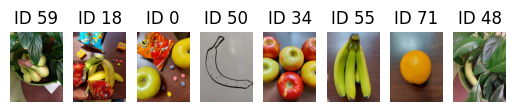

In [4]:
def get_images_in_folder(folder):
    images = []
    IDs = []

    for f in glob.glob(folder + '**/*.jpg', recursive=True):
        img = cv2.imread(f)[:, :, ::-1]

        # it may be helpful to resize images here depending on your model

        images.append(img)

        # strip out the file name as the id, where file name is like: CV_project05_competition/00.jpg
        id = int(f[-6:-4])
        IDs.append(id)

    return images, IDs

# ------------------------------------
folder_path = "CV_project05_competition/"
images, IDs = get_images_in_folder(folder_path)

# check the first few images
for i in range(8):
    plt.subplot(1, 8, i+1)
    plt.imshow(images[i])
    plt.title(f'ID {IDs[i]}')
    plt.axis('off')

# Convert images to numpy array and predict with model

In [5]:
X = np.array(images)
predictions = model.predict(X)

# pick the max column in each row as the predicted class index (0, 1, or 2),
# which corresponds to apple, banana, or orange.
ypred = np.argmax(predictions, axis=1)
ypred

3/3 [==============================] - 1s 118ms/step


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [6]:
# Convert index (0, 1, 2) to fruit name
ypred = np.array(class_names)[ypred]

In [7]:
output = pd.DataFrame({'ID': IDs, 'Label': ypred})
output = output.sort_values(by='ID')
output

,ID,Label
2,0,banana
81,1,banana
63,2,banana
58,3,banana
49,4,banana
...,...,...
8,82,banana
25,83,banana
13,84,banana
61,85,banana


# Save predicted labels to a CSV file for Kaggle
labels.csv should show up in your files in Colab. You can download it to your computer, then go to the Kaggle site to submit your predictions.

In [8]:
output.to_csv('labels.csv', index=False)